In [30]:
import os
import numpy as np
import tensorflow as tf
import PIL
from keras.preprocessing.image import ImageDataGenerator


In [31]:
import pathlib
dataset_url = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

C:\Users\Dell\.keras\datasets\flower_photos\roses\102501987_3cdb8e5394_n.jpg


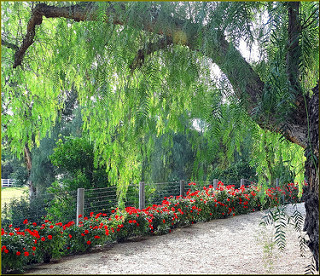

In [33]:
roses = list(data_dir.glob('roses/*'))
print(roses[1])
PIL.Image.open(str(roses[5]))

In [3]:

training_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [14]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
cnn = tf.keras.models.Sequential()

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu' , input_shape=[180,180,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'),)

In [21]:
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'),)

In [22]:
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [26]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
cnn.fit(training_set , validation_data = test_set , epochs = 20)

Epoch 1/20


c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/92 [====>.........................] - ETA: 1:45 - loss: 197.2725 - accuracy: 0.2656

KeyboardInterrupt: 

In [14]:
tf.keras.models.save_model(cnn,'my_model.hdf5')

C:\Users\prana\AppData\Local\Temp\ipykernel_25480\3655746068.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(cnn,'my_model.hdf5')


In [15]:
!pip install streamlit

In [17]:

%%writefile app.py
import streamlit as st
import tensorflow as tf


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('C:\\Users\\prana\\Desktop\\AI\AIML-test\\Flower_Reco\\my_model.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np

st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    # print(
    # "This image most likely belongs to {} with a {:.2f} percent confidence."
    # .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )
    predictions = import_and_predict(image, model)
    class_name = ['Chamomile','Dandelion', 'Rose', 'SunFlower', 'Tulip']
    string="This image likely is: "+class_name[np.argmax(predictions)]
    st.success(string)

Overwriting app.py
